In [1]:
# chapter2-2.3
# NumPy数组的计算：通用函数
# NumPy 变快的关键是利用向量化操作，通常在 NumPy 的通用函数（ufunc）中实现。

In [3]:
# 1：缓慢的循环
import numpy as np
np.random.seed(0)

# 求数组内值的倒数
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] += 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [4]:
# 测试一个很大量的输入数据运行上述代码的时间
bin_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(bin_array)

3.42 s ± 67.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# 下面对数组的操作将作用在数组的每一个元素上
# 这种向量方法被用于将循环推送至 NumPy 之下的编译层，这样会取得更快的执行效率
%timeit (1.0 / bin_array)

6.7 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
# NumPy 中的向量操作是通过通用函数实现的。通用函数的主要目的是对 NumPy 数组中的
# 值执行更快的重复操作。
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [9]:
x = np.arange(9).reshape((3, 3))
print(x)
2 ** x

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

In [10]:
# 三角函数
theta = np.linspace(0, np.pi, 3)
print("theta\t= ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta	=  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [11]:
# 反三角函数
x = [-1, 0, 1]
print("x\t= ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x	=  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [16]:
# 指数和对数运算
x = [1, 2, 3]
print("x\t = ", x)
print("e^x = ", np.exp(x))
print("2^x = ", np.exp2(x))
print("3^x = ", np.power(3, x))

x	 =  [1, 2, 3]
e^x =  [ 2.71828183  7.3890561  20.08553692]
2^x =  [2. 4. 8.]
3^x =  [ 3  9 27]


In [17]:
x = [1, 2, 4, 10]
print("x = ", x)
print("In(x) = ", np.log(x))
print("log2(x)", np.log2(x))
print("log10(x)", np.log10(x))

x =  [1, 2, 4, 10]
In(x) =  [0.         0.69314718 1.38629436 2.30258509]
log2(x) [0.         1.         2.         3.32192809]
log10(x) [0.         0.30103    0.60205999 1.        ]


In [19]:
# 当 x 的值很小时，以下函数给出的值比 np.log 和 np.exp 的计算更精确。
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 = ", np.expm1(x))
print("log(1 + x)", np.log1p(x))

exp(x) - 1 =  [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) [0.         0.0009995  0.00995033 0.09531018]


In [21]:
# 2.3.4:高级的通用函数特性
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [23]:
y = np.zeros(5)
np.power(2, x, out=y)

array([ 1.,  2.,  4.,  8., 16.])

In [24]:
# 聚合
# 以个 reduce 方法会对给定的元素和操作重复执行
x = np.arange(1, 6)
np.add.reduce(x)

15

In [25]:
np.multiply.reduce(x)

120

In [26]:
# 如果需要存储每次计算的中间结果，可以使用 accumulate：
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [27]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

In [28]:
# 2.4-聚合：最大值,最小值和其他值
import numpy as np
L = np.random.random(100)
sum(L)

50.461758453195614

In [29]:
bin_array = np.random.random(1000000)
%timeit sum(bin_array)
%timeit np.sum(bin_array)

154 ms ± 4.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.37 ms ± 98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
np.min(bin_array), np.max(bin_array)

(7.071203171893359e-07, 0.9999997207656334)

In [31]:
# 对于 min、max、sum 和其他 NumPy 聚合，一种更简洁的语法形式是数组对象直接调用这些方法：
print(bin_array.min(), bin_array.max(), bin_array.sum())

7.071203171893359e-07 0.9999997207656334 500216.8034810001


In [32]:
# 多维度聚合
M = np.random.random((3,4))
M

array([[0.79832448, 0.44923861, 0.95274259, 0.03193135],
       [0.18441813, 0.71417358, 0.76371195, 0.11957117],
       [0.37578601, 0.11936151, 0.37497044, 0.22944653]])

In [33]:
# 默认情况下，每一个 NumPy 聚合函数将会返回对整个数组的聚合结果：
M.sum()

5.1136763453287335

In [34]:
# 聚合函数还有一个参数，用于指定沿着哪个轴的方向进行聚合。例如，
# 可以通过指定axis=0 找到每一列的最小值：
M.min(axis=0)

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

In [35]:
# 同样，也可以找到每一行的最大值：
M.max(axis=1)

array([0.95274259, 0.76371195, 0.37578601])

In [36]:
np.argmax(M)

2

In [37]:
!head -4 data/president_heights.csv

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [39]:
# 美国总统身高
heights = np.array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175, 178, 183, 193, 178, 173, 
 174, 183, 183, 168, 170, 178, 182, 180, 183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 
 177, 185, 188, 188, 182, 185])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [40]:
print("Mean height:        ", heights.mean())
print("Standard deviation: ", heights.std())
print("Minimun height:     ", heights.min())
print("maximun height:     ", heights.max())

Mean height:         179.73809523809524
Standard deviation:  6.931843442745892
Minimun height:      163
maximun height:      193


Text(0,0.5,'number')

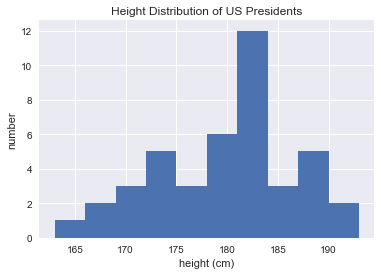

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

In [42]:
# 2.5:数组的计算:广播
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [43]:
X = np.random.random((10, 3))
Xmean = X.mean(0)
Xmean

array([0.49831076, 0.50193438, 0.46752888])

In [44]:
X_centered = X - Xmean
X_centered.mean(0)

array([-4.44089210e-17,  3.33066907e-17, -9.43689571e-17])

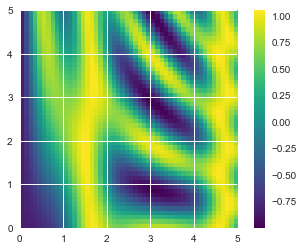

In [45]:
# 画一个二维函数
# x和y表示0-5区间50个步长的序列
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis] 

z = np.sin(x)**10 + np.cos(10 + y * x) * np.cos(x)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()

In [46]:
# 比较、掩码和布尔逻辑

In [47]:
# 花哨的索引
# 示例：选择随机点
import numpy as np
rand = np.random.RandomState(42)
mean = [0, 0]
cov  = [[1,2],
        [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

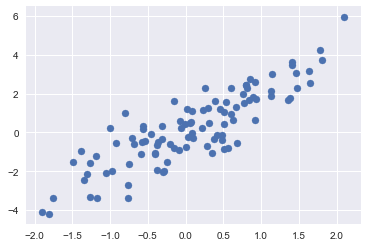

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set() # 设置绘图风格

plt.scatter(X[:, 0], X[:, 1]);

In [50]:
# 这种方法通常用于快速分割数据，即需要分割训练 / 测试数据集以验证统计模型时，
# 以及在解答统计问题时的抽样方法中使用。
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([22, 34, 30, 40, 27, 12, 65,  5, 54, 74, 78, 96, 70, 18, 72, 89, 29,
       45, 36, 88])

In [51]:
selection = X[indices]
selection.shape

(20, 2)

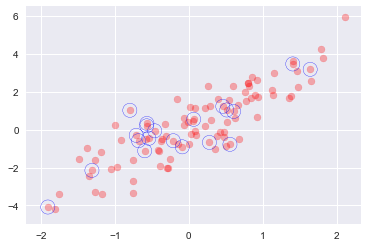

In [57]:
plt.scatter(X[:, 0], X[:, 1],  color='red', alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolor='b', s=200, color='blue');

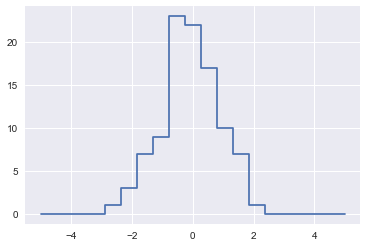

In [58]:
# 2.7.5：数据区间的划分
np.random.seed(42)
x = np.random.randn(100)

# 手动计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 为每个x找到合适和区间
i = np.searchsorted(bins, x)

# 为每个区间加上1
np.add.at(counts, i, 1)
plt.plot(bins, counts, linestyle='steps');

In [61]:
# 数组的排序
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [62]:
# 使用NumPy自带的排序
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [63]:
x.sort()
print(x)

[1 2 3 4 5]


In [65]:
# np.argsort()函数返回的是原始数组排好序的索引值
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [66]:
# 沿着行或列排序
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [67]:
# 对X的每一列排序
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [68]:
# 按行拍戏
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

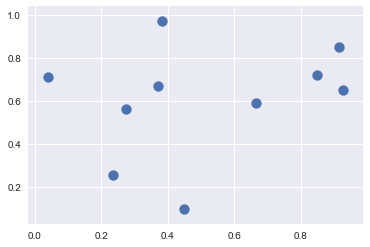

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
X = rand.rand(10, 2)
plt.scatter(X[:, 0], X[:, 1], s=100);

In [75]:
# 在坐标系中计算没对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
# 求出差值的平方
sq_differences = differences ** 2
# 将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 7 1 4 3 6 5 2 8 9]
 [1 7 0 4 6 3 5 9 2 8]
 [2 8 5 4 3 0 9 7 6 1]
 [3 5 6 4 9 8 7 0 1 2]
 [4 7 0 3 1 5 6 2 8 9]
 [5 3 9 8 4 6 2 7 0 1]
 [6 3 5 9 4 7 1 0 8 2]
 [7 0 1 4 3 6 5 2 8 9]
 [8 2 5 3 9 4 6 7 0 1]
 [9 5 3 6 8 4 2 7 1 0]]


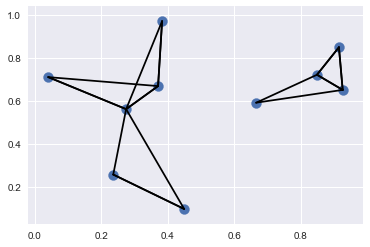

In [77]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)
# 显示
plt.scatter(X[:, 0], X[:, 1], s=100)

# 将每个点和它的最近邻连接
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现
        plt.plot(*zip(X[j], X[i]), color='black')

In [86]:
# 2.9:结构化数据：NumPy的结构化数组
name = ['小周', '小占', '怪怪']
age = [21, 22, 20]
weight = [53.0, 45.0, 65.0]
data = np.zeros(3, dtype={'names': ('name', 'age', 'weight'),
                          'formats': ('U10', 'i4', 'f8')})

In [87]:
data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('小周', 21, 53.), ('小占', 22, 45.), ('怪怪', 20, 65.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])